In [1]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

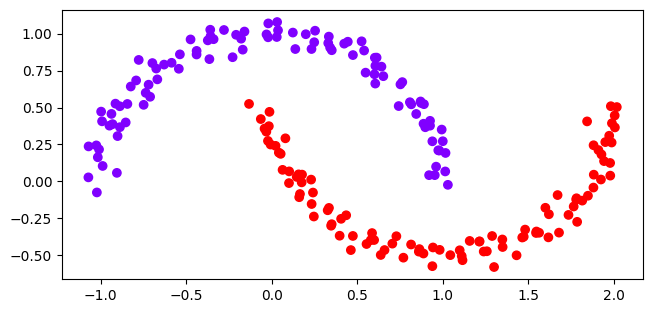

In [3]:
X,y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
print(X)
print(y)
clustering = DBSCAN(eps = 0.2 ,min_samples = 5)
clustering.fit(X)
plt.figure(figsize = (7.5,3.5))
plt.scatter(X[:, 0], X[:,1], c = clustering.labels_, cmap = 'rainbow')
plt.show()


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [3]:
mnist = fetch_openml('mnist_784', version =1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')
print("Shape of X:", X.shape)

Shape of X: (70000, 784)


In [4]:
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
pca = PCA(n_components =50)
X_pca = pca .fit_transform(X_scaled)
print("Reduced shape (After PCA):", X_pca.shape)

Reduced shape (After PCA): (70000, 50)


In [8]:
dbscan = DBSCAN(eps=3, min_samples = 5, n_jobs = -1)
labels = dbscan.fit_predict(X_pca)
s_score = silhouette_score(X_pca, labels)
print("Silhouette Score:", s_score)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index:", ari)

Silhouette Score: -0.20000578463077545
Adjusted Rand Index: 0.036883668896325085


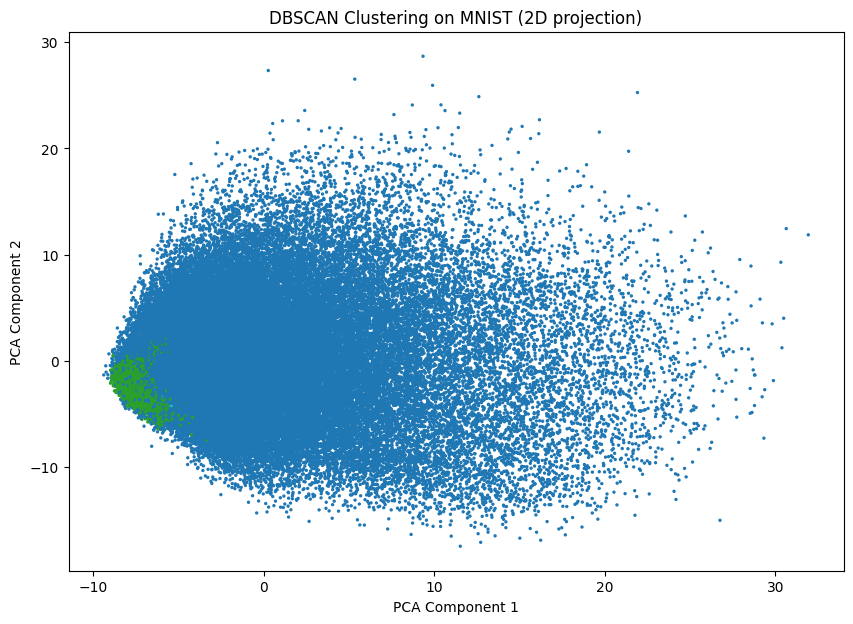

In [13]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_2d[:, 0], X_2d[:, 1],cmap ='tab10', c=labels, s=2)   # cmap = 'tab10' ,'rainbow', 'plasma'
plt.title("DBSCAN Clustering on MNIST (2D projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



Train shape: (60000, 784)
Test shape: (10000, 784)
After PCA: (60000, 50)
Estimated number of clusters: 4
Estimated number of noise points: 55348
Adjusted Rand Index (vs true labels): 0.02263740927313677


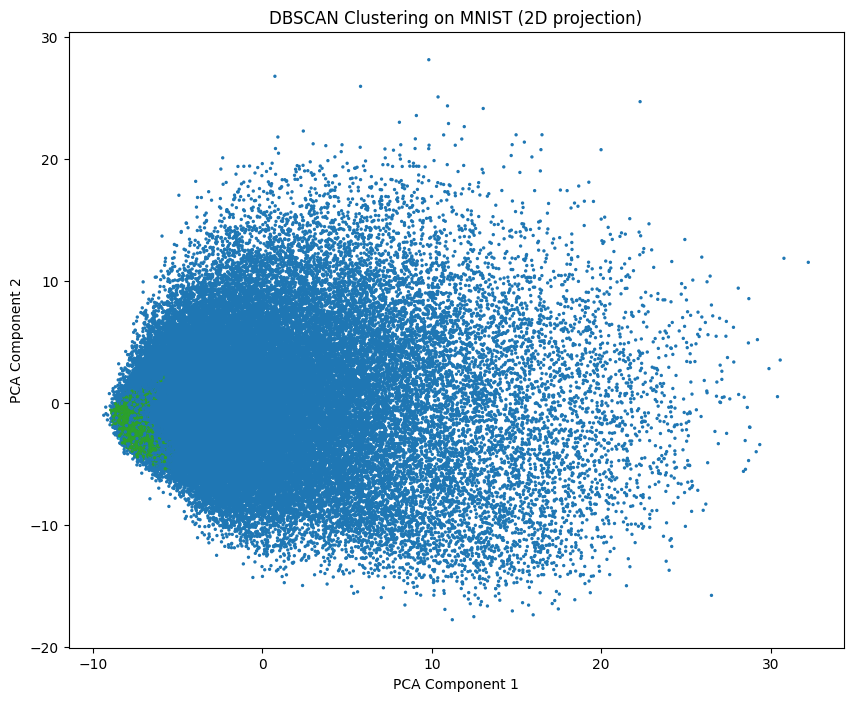

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

# ---------- Step 1: Load MNIST train & test ----------
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

# First column = label, rest = features
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values

X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# ---------- Step 2: Standardize features ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# ---------- Step 3: Dimensionality Reduction ----------
# Reduce to 50D to speed up DBSCAN
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("After PCA:", X_pca.shape)

# ---------- Step 4: Apply DBSCAN ----------
# You may need to tune eps and min_samples
#dbscan = DBSCAN(eps=3, min_samples=5, n_jobs=-1)
dbscan = DBSCAN(eps=2.5, min_samples=10, n_jobs=-1)
labels = dbscan.fit_predict(X_pca)

# ---------- Step 5: Analyze results ----------
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters:", n_clusters)
print("Estimated number of noise points:", n_noise)

# ---------- Step 6: Evaluate (optional, since DBSCAN is unsupervised) ----------
ari = adjusted_rand_score(y_train, labels)
print("Adjusted Rand Index (vs true labels):", ari)

# ---------- Step 7: Visualize ----------
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=2)
plt.title("DBSCAN Clustering on MNIST (2D projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
